**UBER ANALYSIS**
Geography : USA , Sri lanka and pakistan
time period : Jan-Dec 2016
Unit of analysis : Drives
Total Drive: 1,155
Total miles : 12,204

The dataset contains start date,End date,Start location,End location,Miles Driven,Purpose of drive(Buisness,personal,meals,meetings)

In [69]:
#analysis and mathematical libraries
import numpy as np
import pandas as pd

#visualizations libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

#DateTime libraries
import time,datetime

#Escape warning
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv("/content/My Uber Drives - 2016.csv")

In [71]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [57]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [72]:
df.columns = df.columns.str.replace("*"," ")

In [58]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [60]:
df.shape

(1156, 7)

we have 1156 rows  so we can easily identify how many null values are present in our data     df.info() shows the non null values  . so compare with that

In [61]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


**Handling missing values**

In [62]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

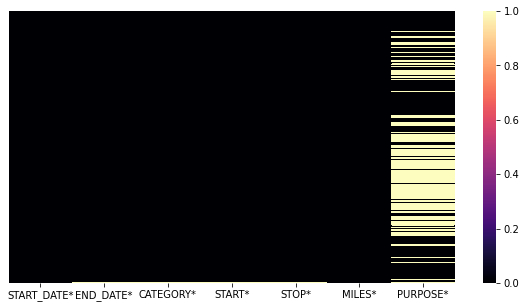

In [65]:
plt.figure(figsize=(10,5))
sb.heatmap(df.isnull(),cmap='magma',yticklabels=False)
plt.show()

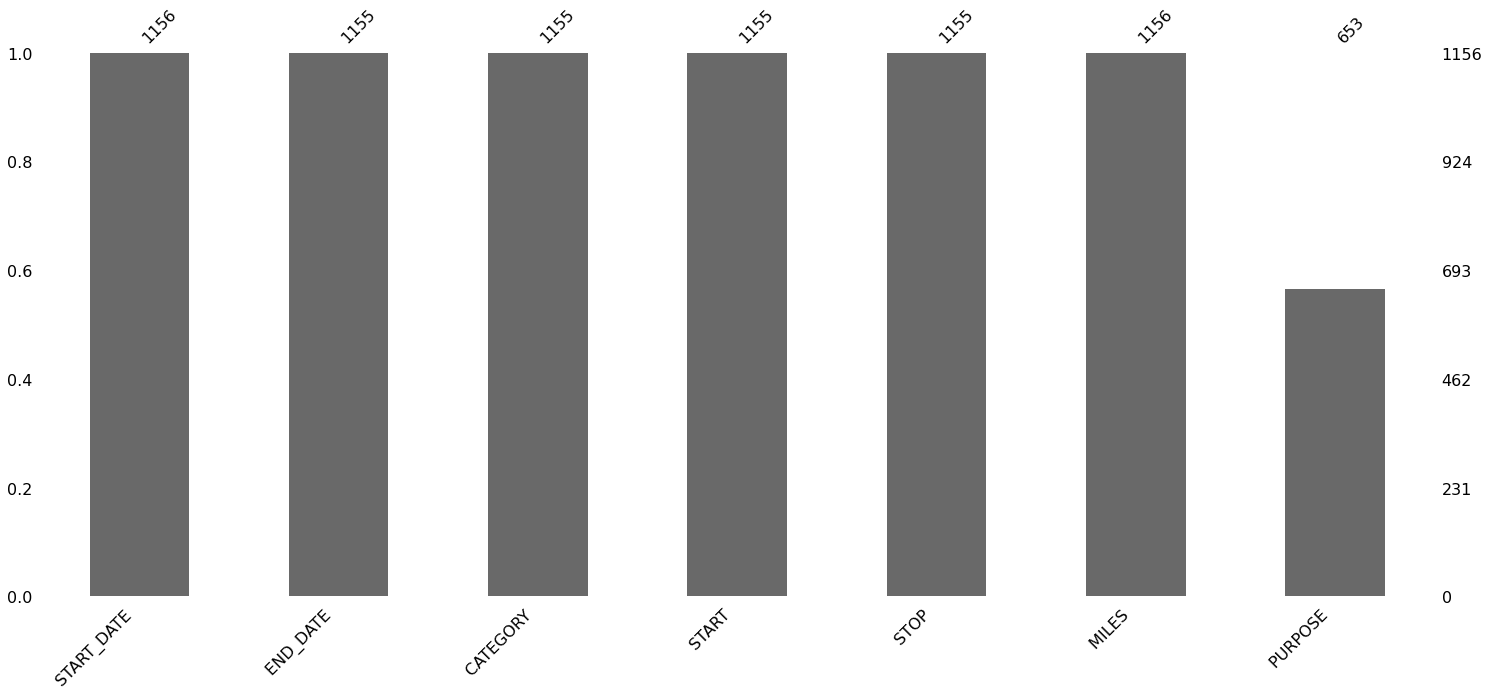

In [12]:
import missingno as msno
msno.bar(df)
plt.show()

we can see the diffrence between each data frame   also each values in each attributes  also easily we can identify the null value diffrentc

In [13]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE       1
CATEGORY       1
START          1
STOP           1
PURPOSE      503
dtype: int64

it return null values even if there only one single null value is present

In [14]:
df.drop(index=1155,axis=0,inplace=True)

here we drop a row with 1155 index 

In [73]:
df["PURPOSE "].isnull().sum()/len(df)


0.435121107266436

here we can get The PURPOSE column have 43% missing values

In [16]:
df['PURPOSE '].fillna(method="ffill",inplace=True)

here we handle the missing value of purpose column

In [17]:
df.isnull().sum()

START_DATE     0
END_DATE       0
CATEGORY       0
START          0
STOP           0
MILES          0
PURPOSE        0
dtype: int64

In [18]:
df["START_DATE "] = pd.to_datetime(df["START_DATE "],errors='coerce')
df["END_DATE"] = pd.to_datetime(df["END_DATE "],errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE   1155 non-null   datetime64[ns]
 1   END_DATE     1155 non-null   object        
 2   CATEGORY     1155 non-null   object        
 3   START        1155 non-null   object        
 4   STOP         1155 non-null   object        
 5   MILES        1155 non-null   float64       
 6   PURPOSE      1155 non-null   object        
 7   END_DATE     1155 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 81.2+ KB


here we convert into date time format   converting object to datetime

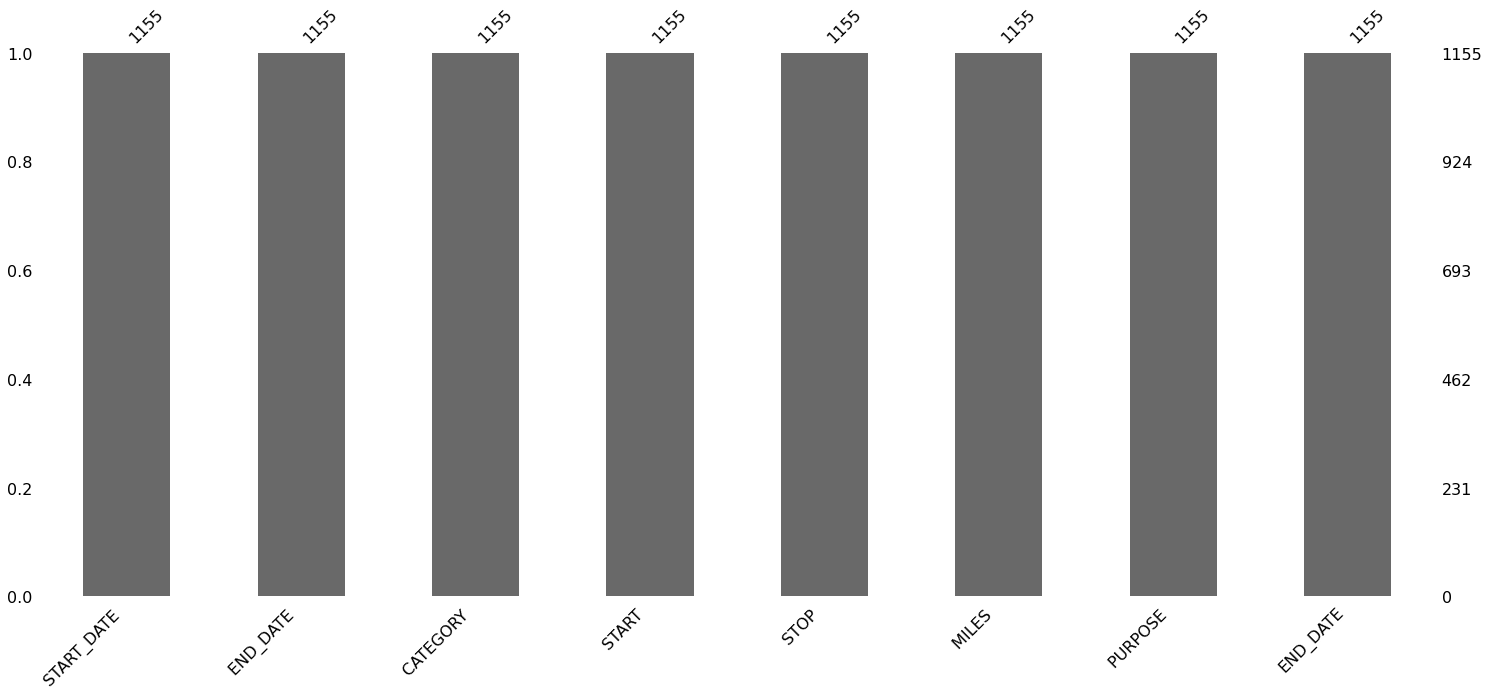

In [19]:
msno.bar(df)
plt.show()

now all columns have same values are present no missing values

In [20]:
category = pd.crosstab(index=df['CATEGORY '],columns='count of travels as per category')
category

col_0,count of travels as per category
CATEGORY,
Business,1078
Personal,77


from this we can see number of travelers and their purpose

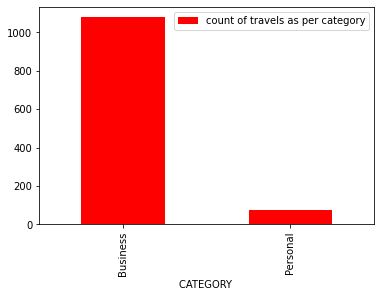

In [21]:
category.plot(kind='bar',color='r')
plt.legend()

In [22]:
start_points = df['START '].value_counts()
start_points
print(start_points[start_points>10])

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START , dtype: int64


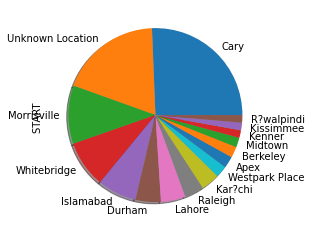

In [23]:
start_points[start_points>10].plot(kind='pie',shadow=True)
plt.show()

In [24]:
print(start_points[start_points<=10])

Emeryville           10
New Orleans          10
Downtown              9
Colombo               8
Banner Elk            8
                     ..
Sand Lake Commons     1
Sky Lake              1
Chalmette             1
Katy                  1
Elk Park              1
Name: START , Length: 161, dtype: int64


In [25]:
stop_point = df['STOP '].value_counts()
stop_point
print(stop_point[stop_point>10])

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Westpark Place       16
Berkeley             16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP , dtype: int64


In [26]:
print(stop_point[stop_point<=10])

Kenner                 10
New Orleans            10
Edgehill Farms         10
Central                 9
Emeryville              9
                       ..
Santa Clara             1
Tudor City              1
Huntington Woods        1
Faubourg Marigny        1
Pontchartrain Beach     1
Name: STOP , Length: 173, dtype: int64


9.9     28
3.1     26
2.1     19
10.4    19
2.5     19
3.0     19
1.8     18
2.2     18
1.7     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
1.4     14
5.5     14
1.6     13
7.9     13
1.5     12
2.7     12
6.2     12
5.7     12
2.9     12
2.3     12
6.0     11
7.7     11
1.0     11
4.9     11
5.1     11
Name: MILES , dtype: int64


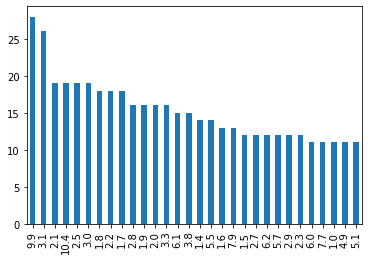

In [27]:
miles = df['MILES '].value_counts()
miles
print(miles[miles>10])
miles[miles>10].plot(kind='bar')

col_0,count of miles
MILES,
False,840
True,315


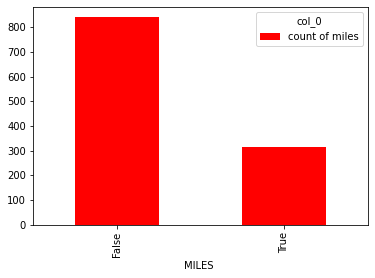

In [28]:
  miles = pd.crosstab(index = df['MILES ']>10,columns='count of miles')
  miles.plot(kind='bar',color='r')
  miles

In [29]:
print(df['PURPOSE '].value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE , dtype: int64


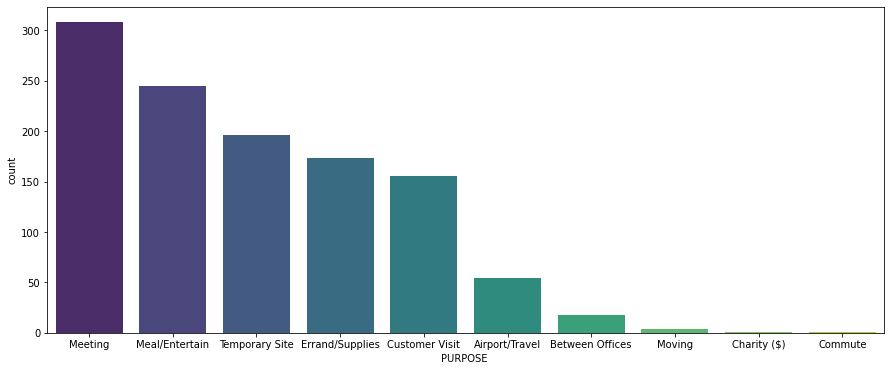

In [30]:
plt.figure(figsize=(15,6))
sb.countplot(df['PURPOSE '],order=df['PURPOSE '].value_counts().index,palette='viridis')
plt.show()

Lets calculate the duration .as there might be some relation of it `with purpose of ride

In [31]:
df['minutes'] = df['END_DATE']-df['START_DATE ']
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,END_DATE,minutes
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:17:00,0 days 00:06:00
1,2016-01-02 01:25:00,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02 01:37:00,0 days 00:12:00
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:38:00,0 days 00:13:00
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:45:00,0 days 00:14:00
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 15:49:00,0 days 01:07:00


In [32]:
df['minutes'] = df['minutes'].dt.total_seconds()/60


In [33]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,END_DATE,minutes
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:17:00,6.0
1,2016-01-02 01:25:00,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02 01:37:00,12.0
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:38:00,13.0
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:45:00,14.0
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 15:49:00,67.0


In [34]:
pd.DataFrame({'Mean':df.groupby(['PURPOSE '])['MILES '].mean().round(1),
              'Min':df.groupby(['PURPOSE '])['MILES '].min(),
              'Max':df.groupby(['PURPOSE '])['MILES '].max()}).reset_index()

,PURPOSE,Mean,Min,Max
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

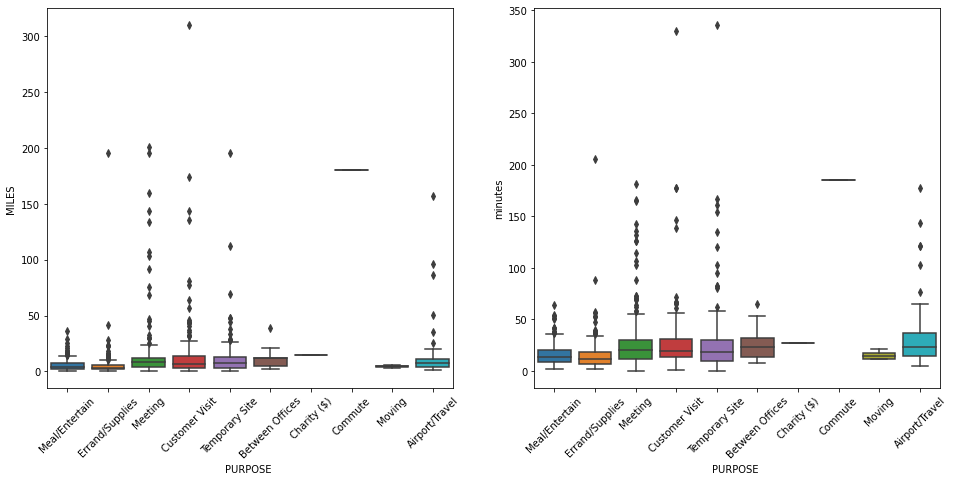

In [35]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sb.boxplot(data=df,x=df['PURPOSE '],y=df['MILES '])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sb.boxplot(data=df,x=df['PURPOSE '],y=df['minutes'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

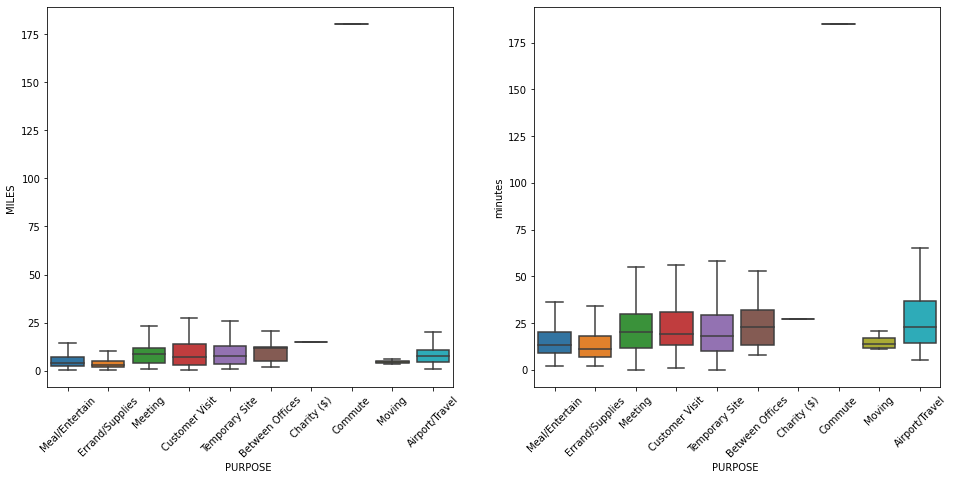

In [36]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sb.boxplot(data=df,x=df['PURPOSE '],y=df['MILES '],showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sb.boxplot(data=df,x=df['PURPOSE '],y=df['minutes'],showfliers=False)
plt.xticks(rotation=45)

CHECKING HOW MANY ROUND TRIPS ARE THERE IE CHECKING START AND STOP POINTS ARE SAME

In [37]:

def round(x):
  if x['START ']==x['STOP ']:
    return 'yes'
  else:
    return 'No'  
df['round_trip']=df.apply(round,axis=1)
df


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,END_DATE,minutes,round_trip
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:17:00,6.0,yes
1,2016-01-02 01:25:00,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02 01:37:00,12.0,yes
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:38:00,13.0,yes
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:45:00,14.0,yes
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 15:49:00,67.0,No
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31 01:14:00,7.0,yes
1151,2016-12-31 13:24:00,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31 13:42:00,18.0,No
1152,2016-12-31 15:03:00,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31 15:38:00,35.0,yes
1153,2016-12-31 21:32:00,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31 21:50:00,18.0,No


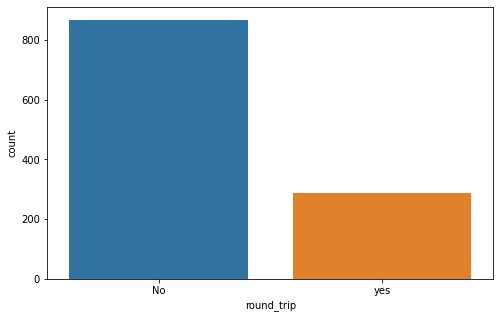

In [38]:
plt.figure(figsize=(8,5))

sb.countplot(df['round_trip'],order=df['round_trip'].value_counts().index)
plt.show()

ENTERING MONTH NAME AND EVALUATING FREQUENCY OF TRIP  IN EACH MONTH

In [39]:
df['month']=pd.DatetimeIndex(df['START_DATE ']).month


In [40]:
dic={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
df['month'] = df['month'].map(dic)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,END_DATE,minutes,round_trip,month
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:17:00,6.0,yes,jan
1,2016-01-02 01:25:00,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02 01:37:00,12.0,yes,jan
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:38:00,13.0,yes,jan
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:45:00,14.0,yes,jan
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 15:49:00,67.0,No,jan
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31 01:14:00,7.0,yes,dec
1151,2016-12-31 13:24:00,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31 13:42:00,18.0,No,dec
1152,2016-12-31 15:03:00,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31 15:38:00,35.0,yes,dec
1153,2016-12-31 21:32:00,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31 21:50:00,18.0,No,dec


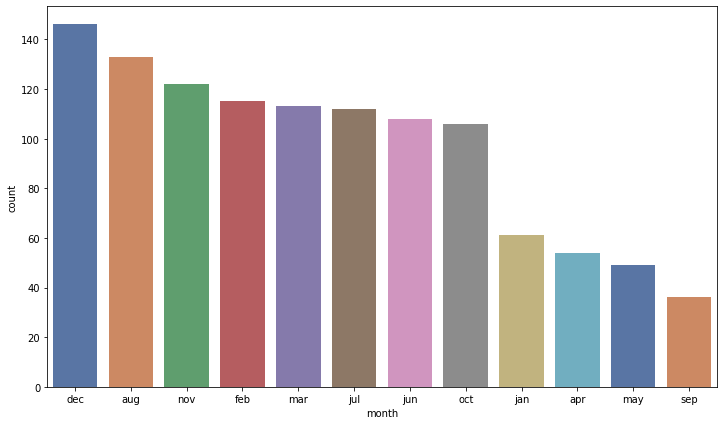

In [41]:
plt.figure(figsize=(12,7))
sb.countplot(df['month'],order=df['month'].value_counts().index,palette='deep')
plt.show()

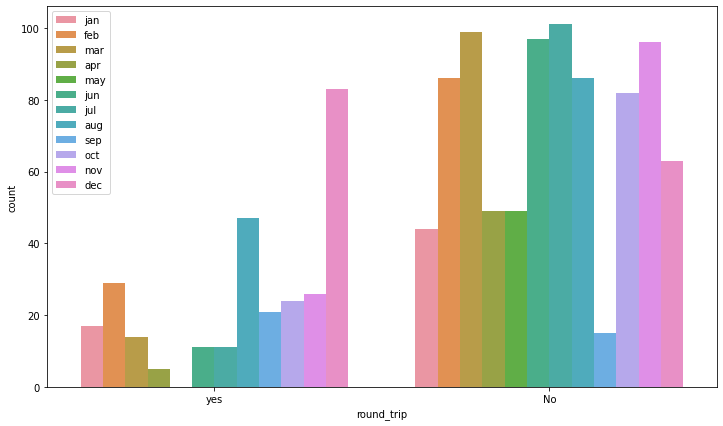

In [42]:
  plt.figure(figsize=(12,7))
  sb.countplot(df['round_trip'],hue=df['month'])
  plt.legend()
  plt.show()

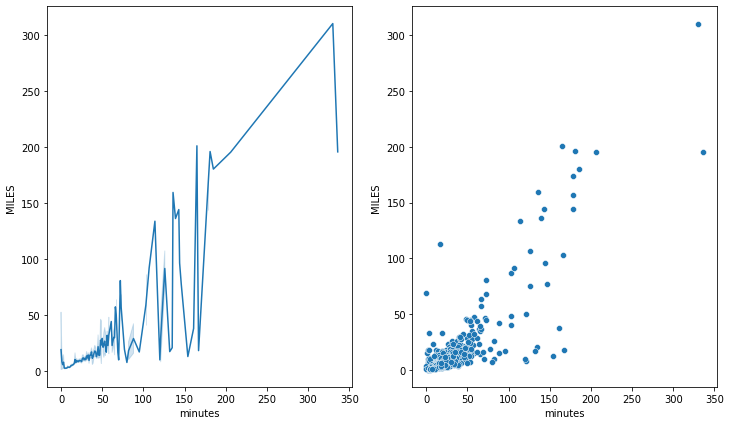

In [43]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sb.lineplot(data=df,x=df['minutes'],y=df['MILES '])
plt.subplot(1,2,2)
sb.scatterplot(data=df,x=df['minutes'],y=df['MILES '])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

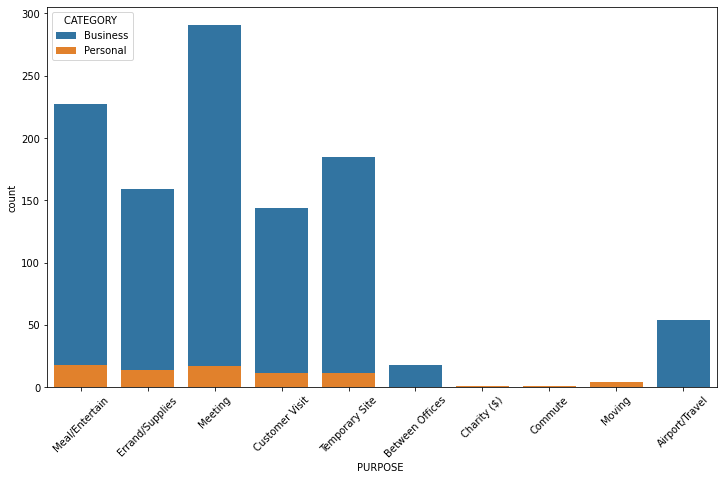

In [44]:
plt.figure(figsize=(12,7))
sb.countplot(data=df,x=df['PURPOSE '],hue=df['CATEGORY '],dodge=False)
plt.xticks(rotation=45)


WHRE DO CUSTOMERS MOST FREQUENTLY TAKES CABS   FREQUENCY CAB RIDES START POINT

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

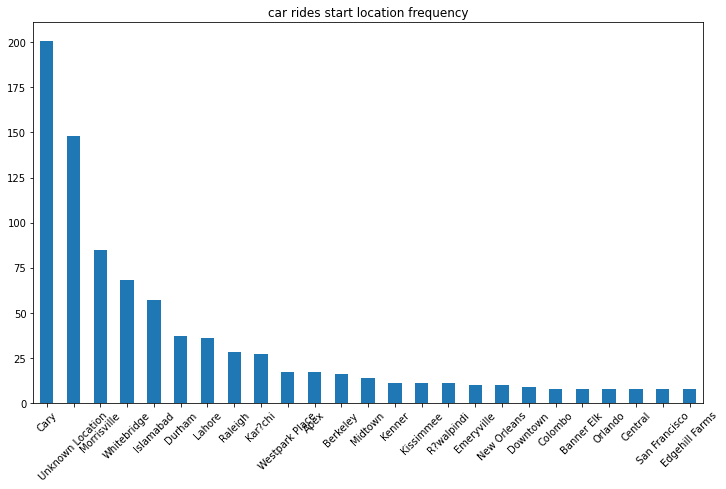

In [45]:
plt.figure(figsize=(12,7))
pd.Series(df['START ']).value_counts()[:25].plot(kind='bar')
plt.title('car rides start location frequency')
plt.xticks(rotation=45)

FREQUENCY OF CAB RIDE STOP LOCATION

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

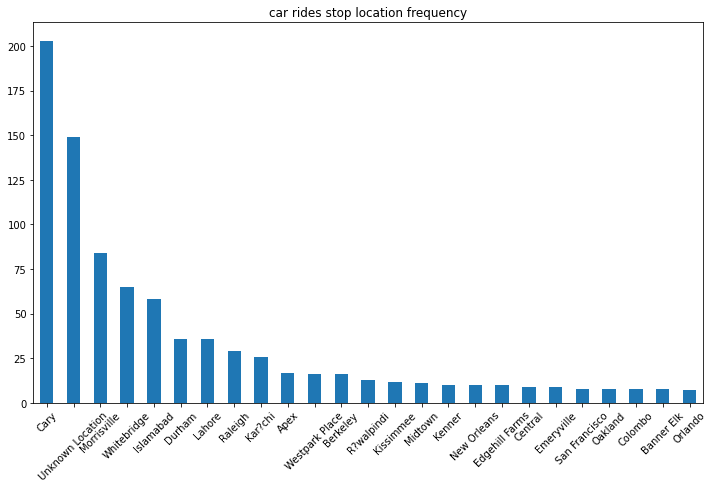

In [46]:
plt.figure(figsize=(12,7))
pd.Series(df['STOP ']).value_counts()[:25].plot(kind='bar')
plt.title('car rides stop location frequency')
plt.xticks(rotation=45)

***CONCLUSIONS***

1.Buisness cabs were not only used more in volume but also have travelled more distance

2.Round trip were more in december

3.December can prove to be best month for earning profit by raising fare as demand is more

4.Seasonal pattern is there

5.Cab traffic are high in just 5 cities comparitevely

6.Most of the cab rides are within a distance of 35 miles taking about 30 minutes

7.For airport cabs are taking more time than usual